## Observations and Insights 

1. The Average Tumor Vol vs Mouse Weight in the Capomulin regimen has a direct correlation with a correlation coeficcient of 0.84, making this a drug regimen worth investigating further. 
2. Capomulin and Ramicane have the lowest range of final tumor volume after completing observations on the mouse. Based on the box and wisker plot of the data, further investigation of these drugs is warranted. Additionally, Capomulin reduced the average tumor size for all mice over a testing period. 
3. Based on the above observations, Capomulin is the most promising regimen in this study, and should be further investigated. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [44]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = mouse_metadata.merge(study_results,on='Mouse ID')
mouse_df.rename(columns={"Mouse ID":"Mouse_ID",
                         "Drug Regimen":"Drug_Regimen",
                         "Tumor Volume (mm3)":"TumorVol"
                        },inplace=True)

# Display the data table for preview
pd.set_option('display.max_rows', 10)
mouse_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVol,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Counting the number of unique mouse IDs in the dataset
mouseCount = len(pd.unique(mouse_df["Mouse_ID"]))
print(f"{mouseCount} unique mice in initial dataset.")

249 unique mice in initial dataset.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse = []
# Check all rows in the dataframe
for i in range(0,1892):
    #if timepoint for row i equals timepoint at row i+1
    if mouse_df.iloc[i,5] == mouse_df.iloc[i+1,5]:
        #add the mouse id for the ith row to the duplicate list
        duplicateMouse.append(mouse_df.iloc[i,0])

In [5]:
# Find the unique mouse IDs from our for loop
duplicateID = list(pd.unique(duplicateMouse))
duplicateID

['b447',
 'd133',
 'f932',
 'g989',
 'h428',
 'l872',
 'n482',
 'o848',
 't573',
 'u153',
 'v199',
 'x226',
 'x336']

In [6]:
# Display data from duplicates by querying the data for boolean expression
duplicate_df = mouse_df.query("Mouse_ID in @duplicateID")
duplicate_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVol,Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0
...,...,...,...,...,...,...,...,...
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0
1743,x226,Ceftamin,Male,23,28,0,45.0,0


In [7]:
# Create a clean DataFrame by querying the dataframe for entries that satisfy the boolean expression
mouse_df = mouse_df.query("Mouse_ID not in @duplicateID")

In [9]:
# Checking the number of mice in the clean DataFrame.
mouseCount = len(pd.unique(mouse_df["Mouse_ID"]))
print(f'{mouseCount} mice in cleaned data set.')

236 mice in cleaned data set.


## Summary Statistics
Creating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.


In [10]:
# create a grouped object on Drug Regimen with the tumor vol series selected
regimen = mouse_df.groupby("Drug_Regimen")['TumorVol']

In [11]:
# construct a dataframe with summary statistics methods passed to the grouped object
pd.DataFrame(
        {
        "Mean":regimen.mean(),
        "Median":regimen.median(),
        "Variance": regimen.std() * regimen.std(),
        "Std. Dev.":regimen.std(),
        "SEM":regimen.std() / np.sqrt(regimen.count())
        }
)

,Mean,Median,Variance,Std. Dev.,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.765682,51.910178,38.835601,6.231822,0.472433
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.345698,53.739593,68.149888,8.255295,0.605308
Naftisol,54.432995,52.544915,65.934669,8.120017,0.598616
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.370732,50.712423,43.782776,6.616855,0.545749
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.284444,52.488221,59.303779,7.700895,0.573991


In [12]:
# Using the aggregation method we can produce the same table much easier
regimen.agg(['mean','median',np.var,np.std,st.sem])

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.765682,51.910178,38.835601,6.231822,0.472433
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.345698,53.739593,68.149888,8.255295,0.605308
Naftisol,54.432995,52.544915,65.934669,8.120017,0.598616
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.370732,50.712423,43.782776,6.616855,0.545749
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.284444,52.488221,59.303779,7.700895,0.573991


## Bar and Pie Charts

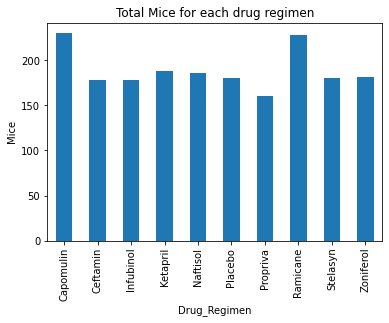

In [116]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mouse_df.groupby("Drug_Regimen")['Mouse_ID'].count().plot.bar()
plt.ylabel("Mice")
plt.title("Total Mice for each drug regimen")
plt.show()

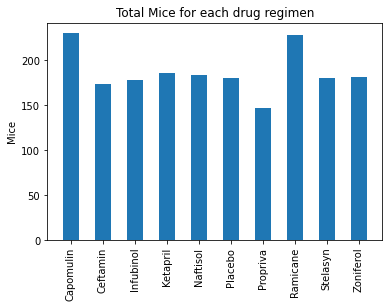

In [117]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen.count().keys(),regimen.count(),width=.5)
plt.xticks(rotation='vertical')
plt.title("Total Mice for each drug regimen")
plt.ylabel("Mice")
plt.show()

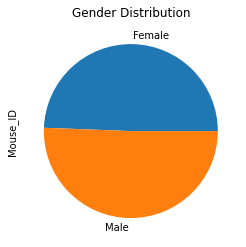

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_df.groupby("Sex")['Mouse_ID'].count().plot.pie()
plt.title("Gender Distribution")
plt.show()

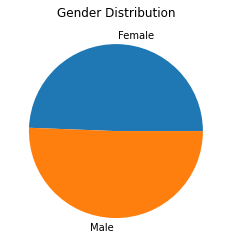

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_df.groupby("Sex")['Mouse_ID'].count(),labels=['Female','Male'])
plt.title("Gender Distribution")
plt.show()

# Quartiles, Outliers and Boxplots
Calculate the final tumor volume of each mouse across four of the treatment regimens: 

**Capomulin, Ramicane, Infubinol, Ceftamin**

In [17]:
# Start by getting the last (greatest) timepoint for each mouse
maxSeries = mouse_df.groupby("Mouse_ID")["Timepoint"].max()
max_df = maxSeries.to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalVol_df = mouse_df.merge(max_df,on=["Mouse_ID",'Timepoint'],how='inner')
finalVol_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVol,Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
231,z314,Stelasyn,Female,21,28,5,45.934712,0
232,z435,Propriva,Female,12,26,10,48.710661,0
233,z581,Infubinol,Female,24,25,45,62.754451,3
234,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Filter for the 4 drugs we are interested in
drugList = ['Capomulin','Ceftamin','Infubinol','Ramicane']
finalVol_df = finalVol_df.query("Drug_Regimen in @drugList")
finalVol_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVol,Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
222,x822,Ceftamin,Male,3,29,45,61.386660,3
224,y163,Infubinol,Female,17,27,45,67.685569,3
228,y769,Ceftamin,Female,6,27,45,68.594745,4
229,y865,Ceftamin,Male,23,26,45,64.729837,3


In [19]:
# Group the last timepoint df by drug regimen and look at tumor volume
drugTumorGroup_df = finalVol_df.groupby("Drug_Regimen")['TumorVol']

# aggregate the tumor volume data by count, min, mean, median, max, and iqr
iqr = drugTumorGroup_df.agg(["count",'mean','median',st.iqr])
iqr

,count,mean,median,iqr
Drug_Regimen,,,,
Capomulin,25,36.667568,38.125164,7.781863
Ceftamin,21,60.183306,61.433892,8.577200
Infubinol,25,58.178246,60.165180,11.477135
Ramicane,25,36.191390,36.561652,9.098537


In [20]:
# Identify the quartiles for each drug
quartiles = []
# for the 4 drugs we are interested in . . . 
for i in range(0,4):
    #apply the mquantiles method to the drug tumor grouped df for each drug's quantiles
    quartiles.append(st.mstats.mquantiles(list(drugTumorGroup_df)[i][1].values))
quartile_df = pd.DataFrame(quartiles,columns=['Q1','median','Q3'],index = drugList)
quartile_df

,Q1,median,Q3
Capomulin,32.233021,38.125164,40.308891
Ceftamin,55.963273,61.433892,64.663415
Infubinol,53.296755,60.165180,65.692940
Ramicane,31.420929,36.561652,40.661618


In [21]:
# Merge the quartile dataframe with the drug_regimen dataframe
box_data = iqr.merge(quartile_df,on = "median",left_index=True)
box_data

,count,mean,median,iqr,Q1,Q3
Capomulin,25,36.667568,38.125164,7.781863,32.233021,40.308891
Ceftamin,21,60.183306,61.433892,8.577200,55.963273,64.663415
Infubinol,25,58.178246,60.165180,11.477135,53.296755,65.692940
Ramicane,25,36.191390,36.561652,9.098537,31.420929,40.661618


### Add Upper and Lower bound for outlier testing

In [22]:
# Lower bound == Q1 - 1.5 * IQR 
box_data['Lower_bound'] = box_data['Q1'] - (1.5 * box_data['iqr'])
# Upper bound == Q3 - 1.5 * IQR 
box_data['Upper_bound'] = box_data['Q3'] + (1.5 * box_data['iqr'])
box_data

,count,mean,median,iqr,Q1,Q3,Lower_bound,Upper_bound
Capomulin,25,36.667568,38.125164,7.781863,32.233021,40.308891,20.560226,51.981686
Ceftamin,21,60.183306,61.433892,8.577200,55.963273,64.663415,43.097473,77.529215
Infubinol,25,58.178246,60.165180,11.477135,53.296755,65.692940,36.081052,82.908643
Ramicane,25,36.191390,36.561652,9.098537,31.420929,40.661618,17.773124,54.309423


### Checking for outliers

In [38]:
# for rows in finalVol_df
for rows in range(len(finalVol_df['Mouse_ID'])):
    #if the tumor vol from finalVol is greater than the upper bound for the drug
    if finalVol_df.iloc[rows,6] >= box_data['Upper_bound'][finalVol_df.iloc[rows,1]]:
        print('Outlier Found.')
    #if the tumor vol from finalVol is less than the lower bound for the drug
    elif finalVol_df.iloc[rows,6] <= box_data['Lower_bound'][finalVol_df.iloc[rows,1]]:
        print('Outlier Found.')

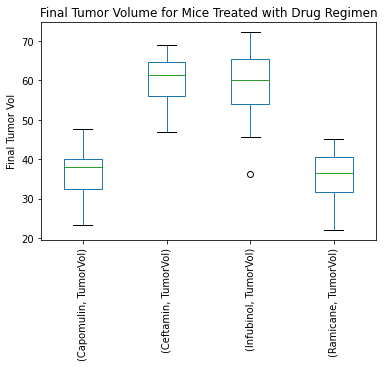

In [136]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bp = finalVol_df[["Drug_Regimen","TumorVol"]].groupby("Drug_Regimen").boxplot(subplots=False,rot=90,grid=False)
plt.ylabel("Final Tumor Vol")
plt.title("Final Tumor Volume for Mice Treated with Drug Regimen")
plt.savefig('./figures/fig1.svg')
plt.show()

#### Our box and whisker plot shows an outlier for infubinol at 32 mm<sup>3</sup>, but since it is just within our lower bound I decided to leave it in the data set.

## Line Graph
#### Tumor Volume vs Time for mouse treated with Capomulin

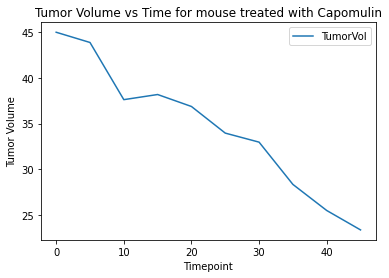

In [135]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = mouse_df[mouse_df["Mouse_ID"] == 's185']
s185_df.plot(x='Timepoint',y='TumorVol')
plt.ylabel("Tumor Volume")
plt.title('Tumor Volume vs Time for mouse treated with Capomulin')
plt.savefig('./figures/fig2.svg')
plt.show()

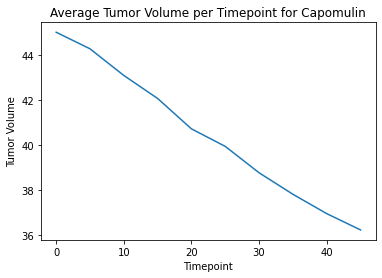

In [149]:
# Plotting the average tumor volume for each timepoint for mice treated with Capomulin
mouse_df[mouse_df["Drug_Regimen"] == 'Capomulin'].groupby('Timepoint')['TumorVol'].mean().plot()
plt.ylabel("Tumor Volume")
plt.title('Average Tumor Volume per Timepoint for Capomulin')
plt.savefig('./figures/fig4.svg')
plt.show()

## Scatter Plot / Correlation and Regression of Average tumor vol vs weight

In [138]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinGroup = mouse_df[mouse_df['Drug_Regimen']=="Capomulin"].groupby("Mouse_ID")
x = capomulinGroup['TumorVol'].mean()
y = capomulinGroup['Weight (g)'].mean()

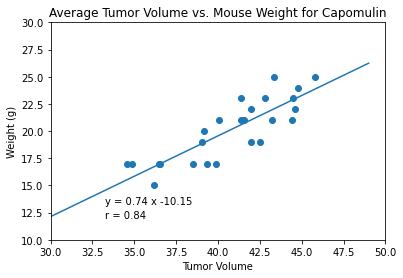

In [134]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

a = np.arange(0,50)
fitLine = slope * a + intercept
plt.scatter(x,y)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlim(30,50)
plt.ylim(10,30)
plt.xlabel("Tumor Volume")
plt.ylabel("Weight (g)")
plt.plot(a,fitLine)
plt.figtext(.25,.25,f"y = {round(slope,2)} x {round(intercept,2)}")
plt.figtext(.25,.20,f"r = {round(rvalue,2)}")
plt.savefig('./figures/fig3.svg')
plt.show()